In [14]:
import pandas as pd
import config as conf

df = pd.read_csv(conf.CSV_FILE)

df.head()

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


In [15]:
image_ids = df["ImageId"]
encoded_pixels = df["EncodedPixels"]

size = len(df)

print(f"Number of empty ImageId values - {image_ids.isna().sum()}")
print(f"Number of empty EncodedPixel values - {encoded_pixels.isna().sum()}")

print(f"Percent of empty ImageId values - {image_ids.isna().sum() / size * 100}%")
print(f"Percent of empty EncodedPixel values - {encoded_pixels.isna().sum() / size * 100:.2f}%")


Number of empty ImageId values - 0
Number of empty EncodedPixel values - 149999
Percent of empty ImageId values - 0.0%
Percent of empty EncodedPixel values - 64.73%


In [24]:
sample = df.sample(frac=0.1)

In [17]:
from PIL import Image
from os.path import join


def is_truncated_image(image_id):
    try:
        Image.open(join(conf.IMAGES_DIR, image_id)).load()
    except OSError as e:
        print(e, image_id)
        return True
    return False 

In [26]:
n_truncated = sample["ImageId"].apply(is_truncated_image).sum()

print(f"The sum of truncated images in a sample - {n_truncated}")

The sum of truncated images - 0


In [10]:
df["truncated"] = df["ImageId"].apply(is_truncated_image)

print(f"Truncated images in whole dataframe - {df['truncated'].sum()}")
df["truncated"].head()

image file is truncated (51 bytes not processed) 6384c3e78.jpg


KeyboardInterrupt: 

In [12]:
trunc_image = "6384c3e78.jpg"
df = df[df["ImageId"] != trunc_image]

In [18]:
# df.to_csv(conf.CSV_FILE, sep=',', index=False)

In [21]:
import cv2 

def analyze_color(image_id):
    image_path = join(conf.IMAGES_DIR, image_id)
    try:
        # Read the image using OpenCV
        img = cv2.imread(image_path)

        # Convert the image from BGR to RGB
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Flatten the 2D image array into a 1D array
        pixels = img_rgb.reshape((-1, 3))

        # Calculate the mean color values for each channel (R, G, B)
        mean_color = pixels.mean(axis=0)

        return mean_color
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None


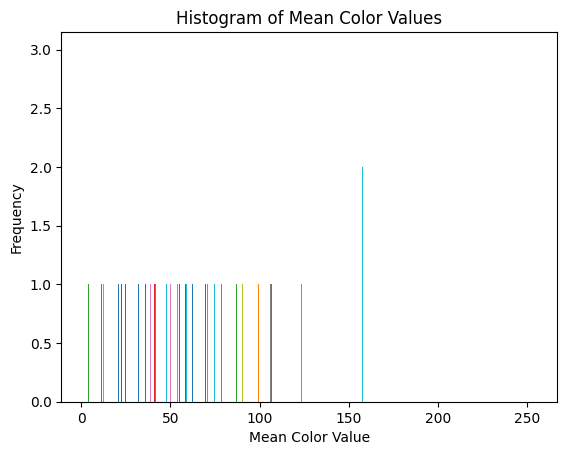

In [26]:
import matplotlib.pyplot as plt

color_df = pd.DataFrame()

color_df["mean_color"] = sample['ImageId'].apply(analyze_color)
plt.hist(df['mean_color'], bins=30)
plt.title('Histogram of Mean Color Values')
plt.xlabel('Mean Color Value')
plt.ylabel('Frequency')
plt.show()


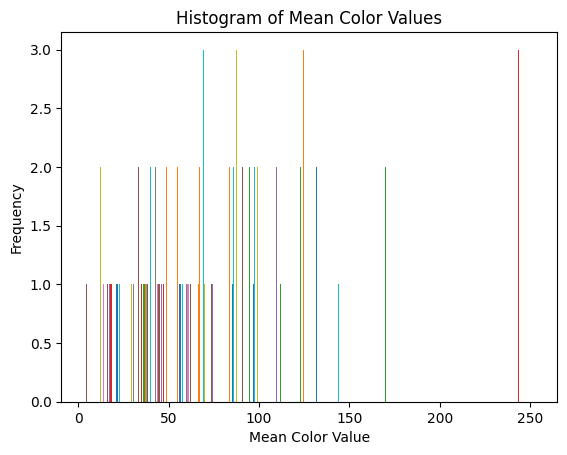

In [27]:
plt.hist(color_df['mean_color'])
plt.title('Histogram of Mean Color Values')
plt.xlabel('Mean Color Value')
plt.ylabel('Frequency')
plt.show()